# PLOT FOR THR, LATENCY FOR POWER MODE TESTs

#### Globals

In [23]:
NETWORK="resnet50"
PLATFORM="Orin AGX"
POWER_MODES={'PM0': {},'PM1': {},'PM2': {}}

### FUNCTIONS

In [24]:
import re
import matplotlib.pyplot as plt

# Función para leer los datos del archivo .md
def read_data_from_md(file_path):
    data = {}
    current_pm = None
    current_bs = None
    
    with open(file_path, 'r') as file:
        lines = file.readlines()
        
        for line in lines:
            # Detectar el Power Mode
            if line.startswith(f'# {PLATFORM} PM'):
                current_pm = line.strip().split()[-1]
            
            # Detectar el batch size
            bs_match = re.match(rf'## {NETWORK} bs (\d+)', line)
            if bs_match:
                current_bs = int(bs_match.group(1))
            
            # Leer los datos de la tabla
            table_match = re.match(r'\| (\w+) +\| +([\d.,]+)', line)
            if table_match and current_pm and current_bs is not None:
                model = table_match.group(1)
                infs_str = table_match.group(2)
                
                # Eliminar separadores de miles y convertir a flotante
                infs = float(infs_str.replace('.', '').replace(',', '.'))
                
                # Organizar los datos en el diccionario
                if model not in data:
                    data[model] = POWER_MODES
                data[model][current_pm][current_bs] = infs
    
    return data

In [25]:
# Función para graficar los datos
def plot_model_data(model_name, model_data):
    plt.rcParams.update({'font.size': 14})  # Puedes ajustar el tamaño aquí
    plt.figure(figsize=(5, 3.5)).tight_layout()
    for pm, data in model_data.items():
        batch_sizes = list(data.keys())
        infs = list(data.values())
        plt.plot(batch_sizes, infs, marker='o', label=f'Power Mode {pm}')
    
    plt.title(f'Jetson {PLATFORM} {model_name}')
    plt.xlabel('Batch Size')
    plt.ylabel('Throughput [inf/s]')
    plt.legend()
    plt.grid(True)
    plt.grid(which='major', linestyle='-', linewidth='0.5', color='grey')  # Ajusta la grilla principal
    plt.grid(which='minor', linestyle=':', linewidth='0.5', color='lightgrey')  # Ajusta la grilla secundaria
    plt.minorticks_on()
    #plt.savefig(f'{model_name}.png', format='png',bbox_inches='tight')
    plt.show()

#### plotea el Thr.

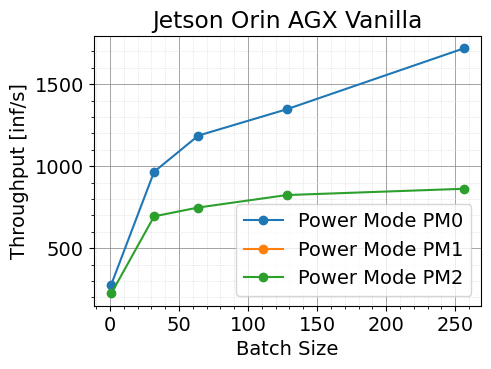

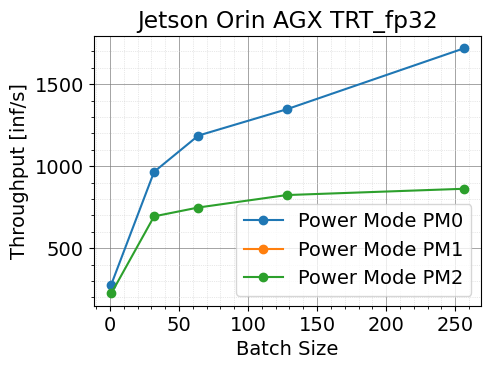

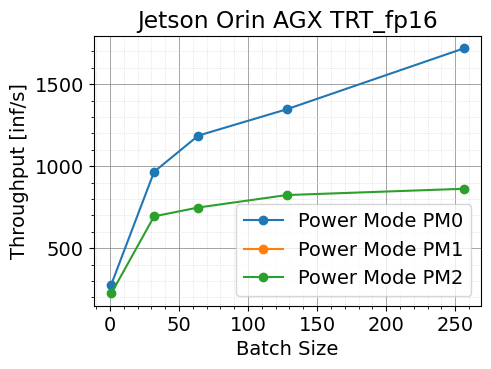

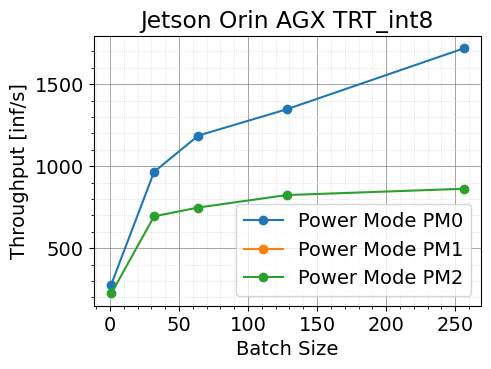

In [26]:
# Ruta del archivo .md
file_path = 'test.md'

# Leer los datos del archivo .md
data = read_data_from_md(file_path)

# Graficar cada modelo
for model_name, model_data in data.items():
    plot_model_data(model_name, model_data)
